In [297]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import QuantileTransformer, StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import  LinearSVR
from sklearn.compose import ColumnTransformer

In [235]:
sns.set_theme()
sns.set_style('darkgrid')
sns.set(rc={
    'axes.labelsize': 15,
    'axes.titlesize': 15,
    'axes.titlepad': 10,
    'xtick.labelsize': 10,
    'xtick.color': 'grey',
    'ytick.labelsize': 10,
    'ytick.color': 'grey',
    }) 

In [236]:
dd = pd.read_csv("data/dd.csv")
hd = pd.read_csv("data/hd.csv")

In [237]:
dd[dd['date'] < '2012-01-01']['count'].mean()

3405.7616438356163

In [238]:
dd.head()

,date,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count,season,rain,snow,israin,issnow
0,2011-01-01,0,1,0,6,0,2,0.344167,0.363625,0.913930,0.160446,331,654,985,3,0.125,0.0,1,0
1,2011-01-02,0,1,0,0,0,2,0.363478,0.353739,0.678024,0.248539,131,670,801,3,0.150,0.0,1,0
2,2011-01-03,0,1,0,1,1,1,0.196364,0.189405,0.236453,0.248309,120,1229,1349,3,0.000,0.0,0,0
3,2011-01-04,0,1,0,2,1,1,0.200000,0.212122,0.445402,0.160296,108,1454,1562,3,0.000,0.0,0,0
4,2011-01-05,0,1,0,3,1,1,0.226957,0.229270,0.467980,0.186900,82,1518,1600,3,0.000,0.0,0,0


<Axes: >

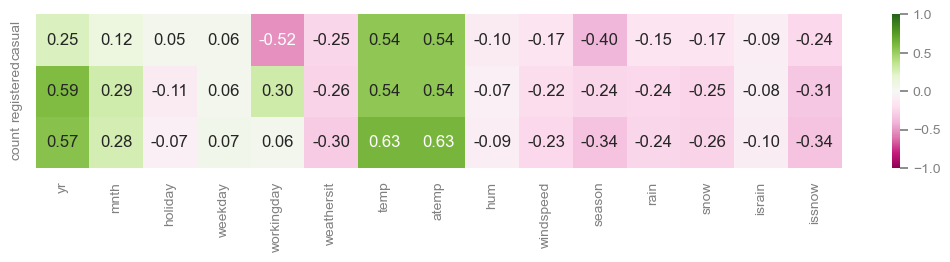

In [239]:
fig, ax = plt.subplots(figsize=(13, 2))

sns.heatmap(
        dd.corr(numeric_only=True).iloc[10:13, np.r_[0:10, 13:18]],  
        annot=True,
        fmt=".2f",
        cmap="PiYG",
        # mask=mask,
        vmin=-1,
        vmax=1,
)

<Axes: >

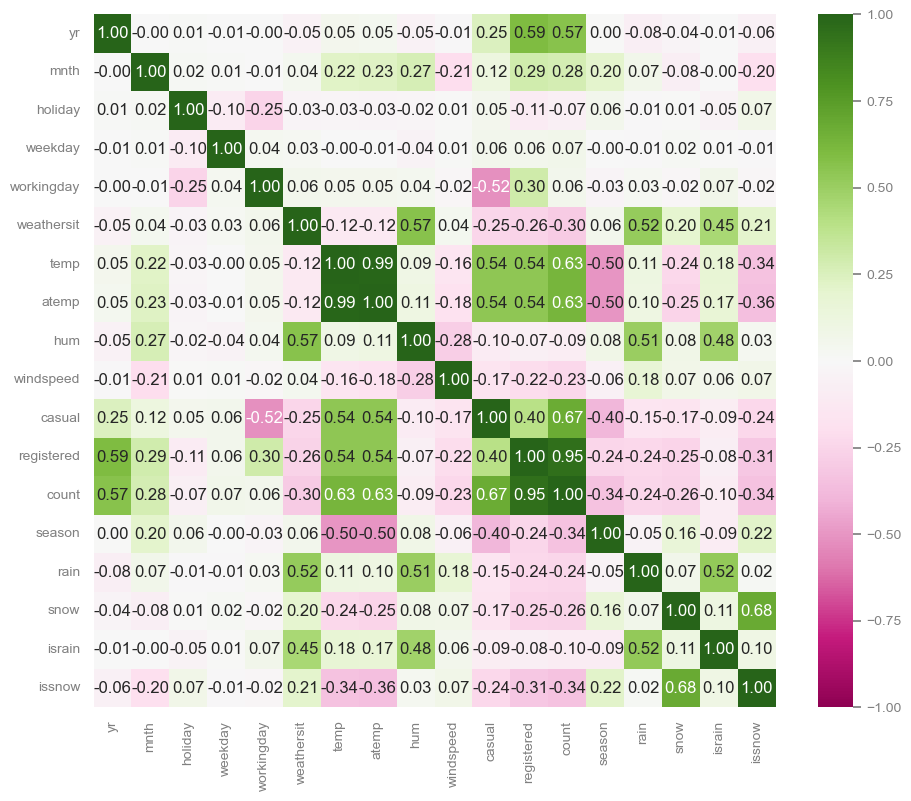

In [240]:
fig, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(
        dd.corr(numeric_only=True),  
        annot=True,
        fmt=".2f",
        cmap="PiYG",
        # mask=mask,
        vmin=-1,
        vmax=1,
)

<Axes: >

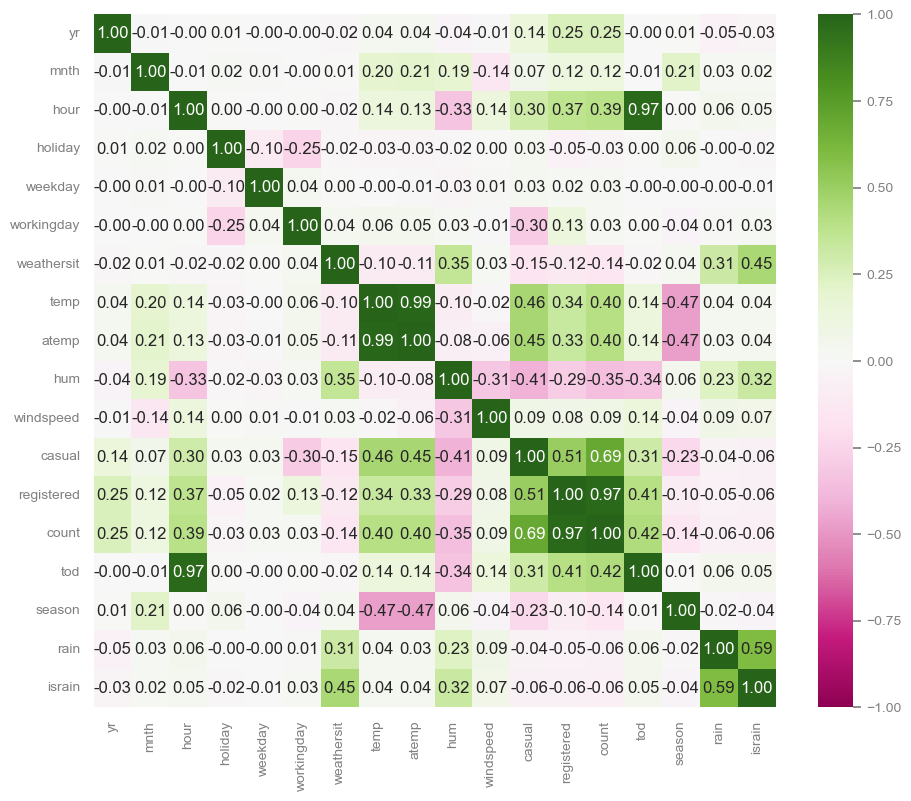

In [241]:
fig, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(
        hd.corr(numeric_only=True),
        annot=True,
        fmt=".2f",
        cmap="PiYG",
        # mask=mask,
        vmin=-1,
        vmax=1,
)

In [263]:
hd_enc = pd.get_dummies(hd, columns=["season", "tod"], dtype=int).drop(
    [
        "mnth",
        "hour",
        "holiday",
        "weekday",
        "weathersit",
        "atemp",
        "israin",
        # "rain",
        "datetime",
    ],
    axis=1,
)
dd_enc = pd.get_dummies(dd, columns=["season"], dtype=int).drop(
    [
        "mnth",
        "holiday",
        "weekday",
        "weathersit",
        "atemp",
        "israin",
        "date",
        "issnow",
        "snow",
        # "rain",
        "windspeed"
    ],
    axis=1,
)

In [326]:
hd_enc.describe()

,yr,workingday,temp,hum,windspeed,casual,registered,count,rain,season_0,season_1,season_2,season_3,tod_0,tod_1,tod_2,tod_3
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.502561,0.682721,0.496987,0.612821,0.190098,35.676218,153.786869,189.463088,0.015247,0.253064,0.253352,0.248864,0.244721,0.246044,0.250877,0.251741,0.251338
std,0.500008,0.465431,0.192556,0.243925,0.122340,49.305030,151.357286,181.387599,0.068390,0.434780,0.434943,0.432367,0.429934,0.430717,0.433531,0.434025,0.433795
min,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.340000,0.419753,0.104500,4.000000,34.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.500000,0.629630,0.194000,17.000000,115.000000,142.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.660000,0.827160,0.253700,48.000000,220.000000,281.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [244]:
dd_enc.describe()

,yr,workingday,temp,hum,casual,registered,count,season_0,season_1,season_2,season_3
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.500684,0.683995,0.495385,0.590669,848.176471,3656.172367,4504.348837,0.251710,0.251710,0.248974,0.247606
std,0.500342,0.465233,0.183051,0.188463,686.622488,1560.256377,1937.211452,0.434293,0.434293,0.432715,0.431917
min,0.000000,0.000000,0.059130,0.000000,2.000000,20.000000,22.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.337083,0.465449,315.500000,2497.000000,3152.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.498333,0.591817,713.000000,3662.000000,4548.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.655417,0.730706,1096.000000,4776.500000,5956.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,0.861667,1.000000,3410.000000,6946.000000,8714.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
def scaler():
    '''The Pipeline for column transformers, to perform different transofrmation on different columns'''
    scaling_transformer = ColumnTransformer(
        transformers=[
            ("qnt_scaler", QuantileTransformer(n_quantiles=500), [8]),
        ],
        remainder='passthrough'
    )
    return scaling_transformer

In [348]:
def reg(type, data, user, feature='temp'):

    if type == 'line':
        print('*** Linear Regression ***')
        X = np.array(data[feature]).reshape((-1, 1))    
    else:
        X = data.drop(["registered", "casual", "count"], axis=1)
    y = data[user]

    if type == 'multi':
            print('*** Multiple Linear Regression ***')

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = LinearRegression()
    pipe = Pipeline(
        [
            # ("scaler", scaler()),
            ("model", model),
        ]
    )
    
    if type == 'poly':
        print('*** Polynomial Regression ***')
        poly = PolynomialFeatures(degree=3, include_bias=False)
        poly_features = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        pipe.fit(poly_features, y_train)
        y_pred = pipe.predict(X_test_poly)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    print(f'*** {user.capitalize()}   ')
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred, squared=False)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print('R-Squared: ', r2)
    print('Root Mean Squared Error: ', mse)
    print('Mean Absolute Percentage Error: ', mape)
    print('Mean Absolute Error: ', mae)

    slope = model.coef_[0]
    c = model.intercept_
    print('\n')
    print("Slope (Coefficient):", slope)
    print("Intercept:", c)

    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    if type == 'line':
        sns.scatterplot(x=X_test.reshape(1, -1)[0], y=y_test, ax=ax[0])
        sns.lineplot(x=X_test.reshape(1, -1)[0], y=y_pred, color="r", linewidth=2, ax=ax[0])
        plt.xlabel(feature)
    else:
        sns.scatterplot(x=X_test["temp"], y=y_test, ax=ax[0])
        sns.lineplot(x=X_test["temp"], y=y_pred, color="r", ax=ax[0])
    sns.scatterplot(x=y_test, y=y_pred, color="g", ax=ax[1])
    ax[1].set_xlabel('Actual Count')
    ax[1].set_ylabel('Predicted Count')
    plt.show()

*** Linear Regression ***
*** Casual   
R-Squared:  0.3832131707914087
Root Mean Squared Error:  490.2063544286931
Mean Absolute Percentage Error:  3.437057380431771
Mean Absolute Error:  353.8801083768193


Slope (Coefficient): 2020.1094492806517
Intercept: -142.4753159177818


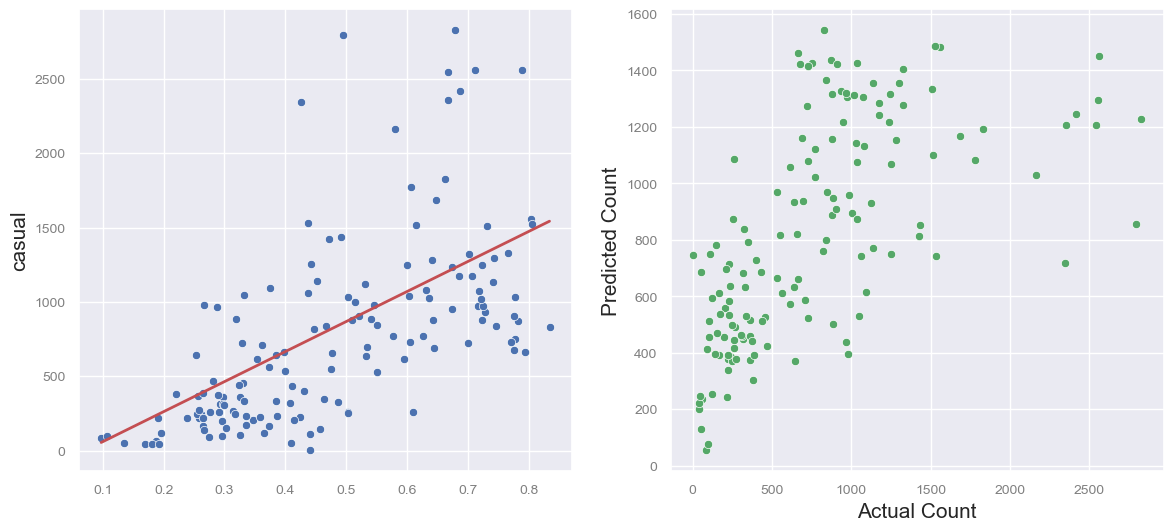

*** Linear Regression ***
*** Registered   
R-Squared:  0.28614571374854936
Root Mean Squared Error:  1398.8560131245963
Mean Absolute Percentage Error:  1.6026676503941364
Mean Absolute Error:  1177.0888665669738


Slope (Coefficient): 4555.2838080661195
Intercept: 1414.63265285542


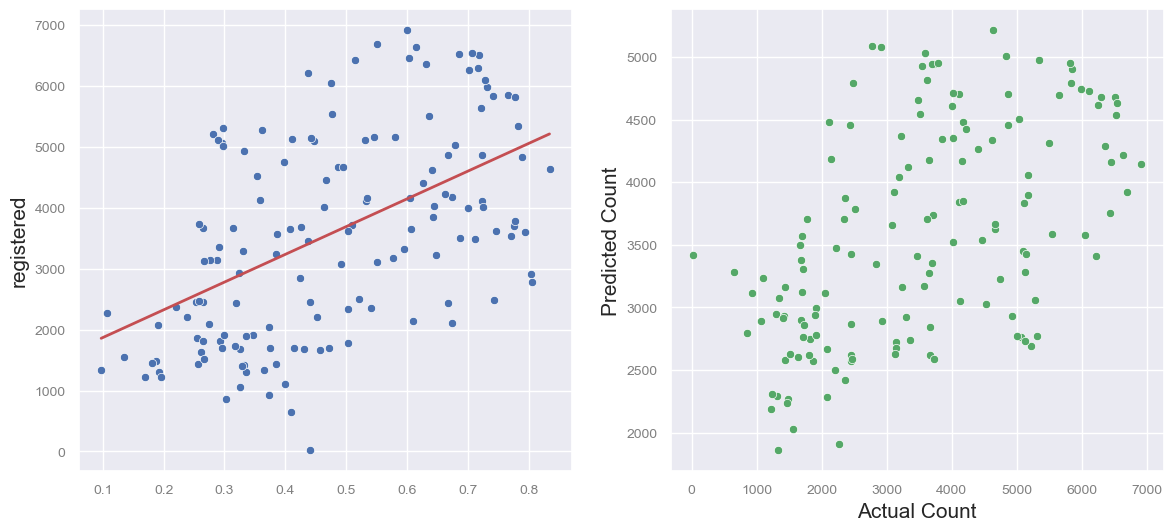

*** Linear Regression ***
*** Count   
R-Squared:  0.40371020554910975
Root Mean Squared Error:  1546.3026500758826
Mean Absolute Percentage Error:  1.6893437501107564
Mean Absolute Error:  1291.9688988743346


Slope (Coefficient): 6575.393257346771
Intercept: 1272.1573369376388


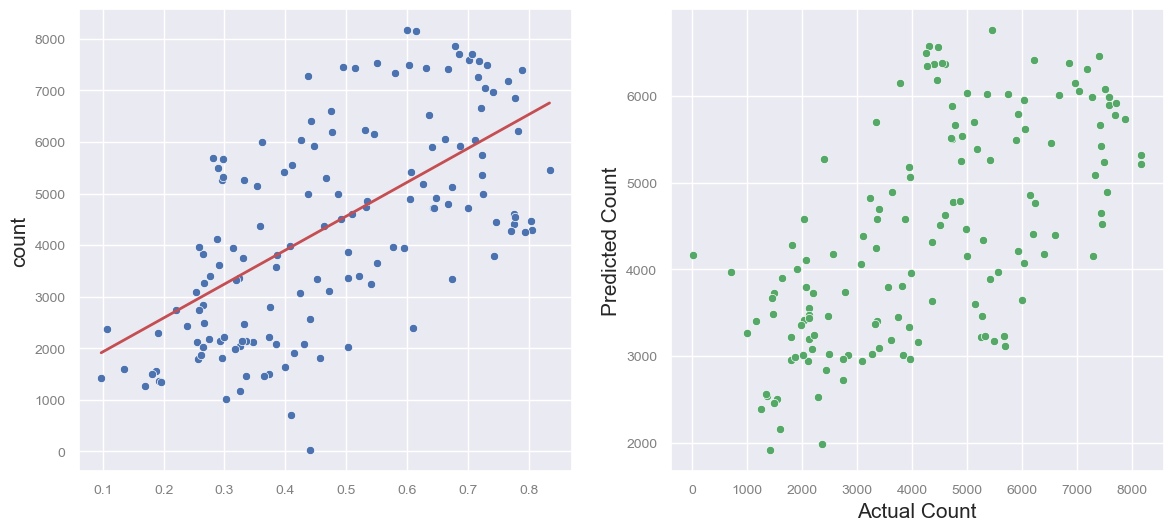

*** Multiple Linear Regression ***
*** Casual   
R-Squared:  0.7123223701935083
Root Mean Squared Error:  334.78380181524545
Mean Absolute Percentage Error:  1.642057578777162
Mean Absolute Error:  262.3899358218764


Slope (Coefficient): 287.035433485144
Intercept: 466.0252769393707


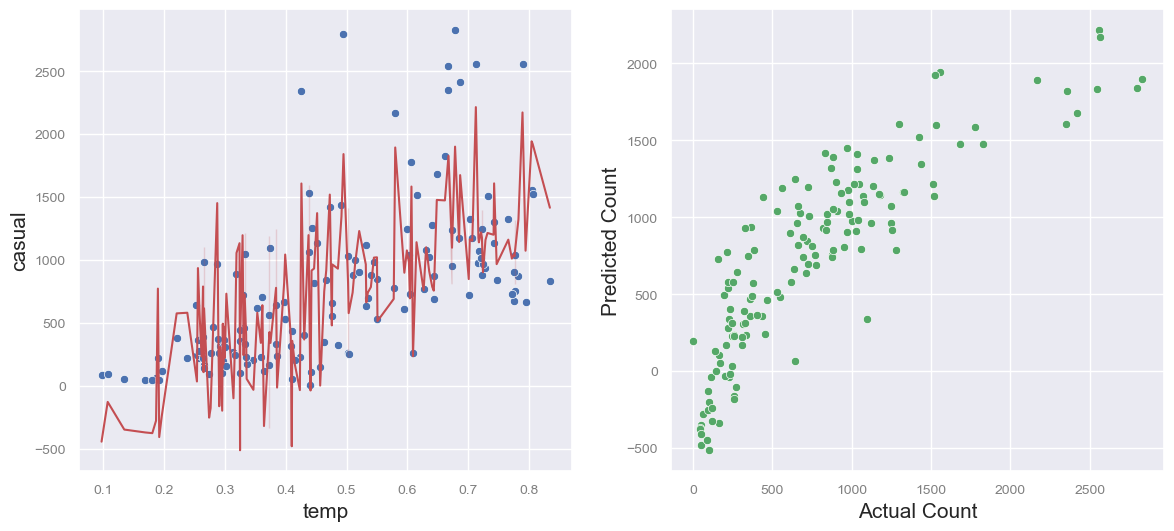

*** Multiple Linear Regression ***
*** Registered   
R-Squared:  0.7985102049803625
Root Mean Squared Error:  743.1812699535349
Mean Absolute Percentage Error:  1.4567448976897481
Mean Absolute Error:  568.9103172422954


Slope (Coefficient): 1693.0051706131765
Intercept: 330.58629502130816


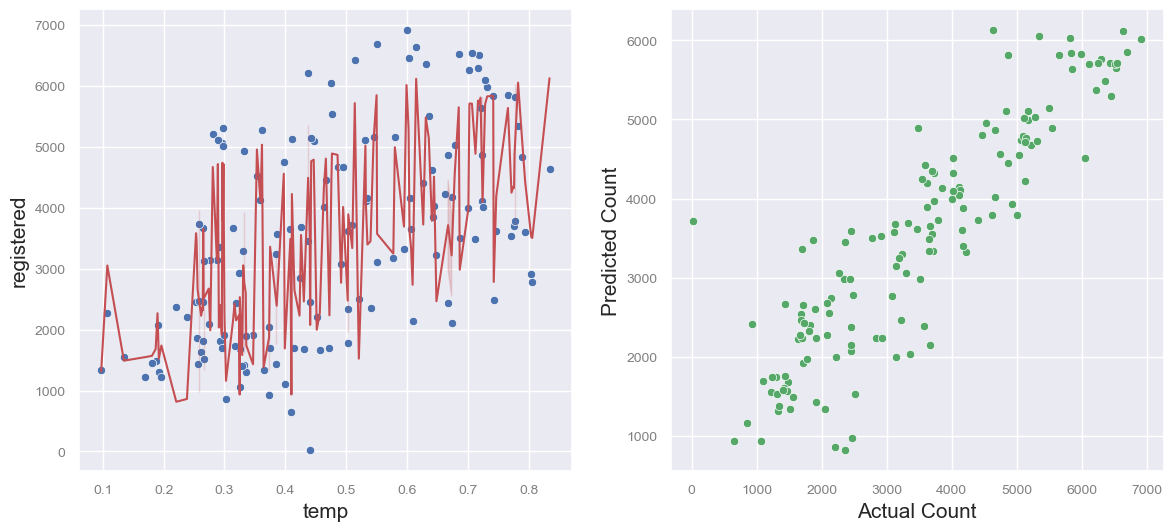

*** Multiple Linear Regression ***
*** Count   
R-Squared:  0.8102816329952471
Root Mean Squared Error:  872.208873877889
Mean Absolute Percentage Error:  1.4012562024168367
Mean Absolute Error:  687.6585621156337


Slope (Coefficient): 1980.040604098321
Intercept: 796.611571960681


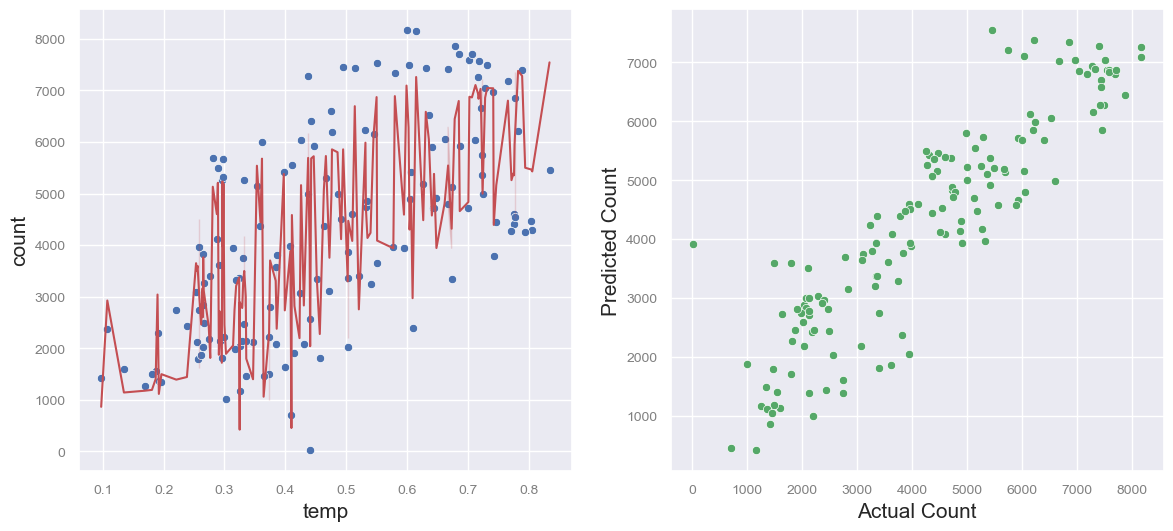

*** Polynomial Regression ***
*** Casual   
R-Squared:  0.8651658268883536
Root Mean Squared Error:  229.19829311761293
Mean Absolute Percentage Error:  0.8428298383228991
Mean Absolute Error:  169.47108843537416


Slope (Coefficient): -9886757598578.38
Intercept: -1295607352118522.0


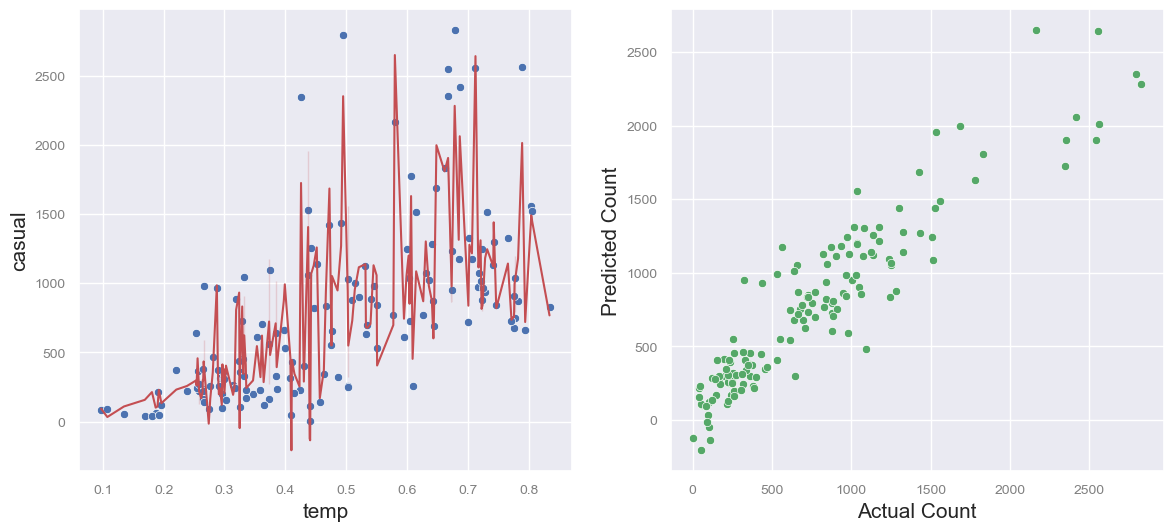

*** Polynomial Regression ***
*** Registered   
R-Squared:  0.8805417261985735
Root Mean Squared Error:  572.2375408396923
Mean Absolute Percentage Error:  0.44762420810800546
Mean Absolute Error:  421.7670068027211


Slope (Coefficient): -24313572949825.67
Intercept: 1471506627201573.0


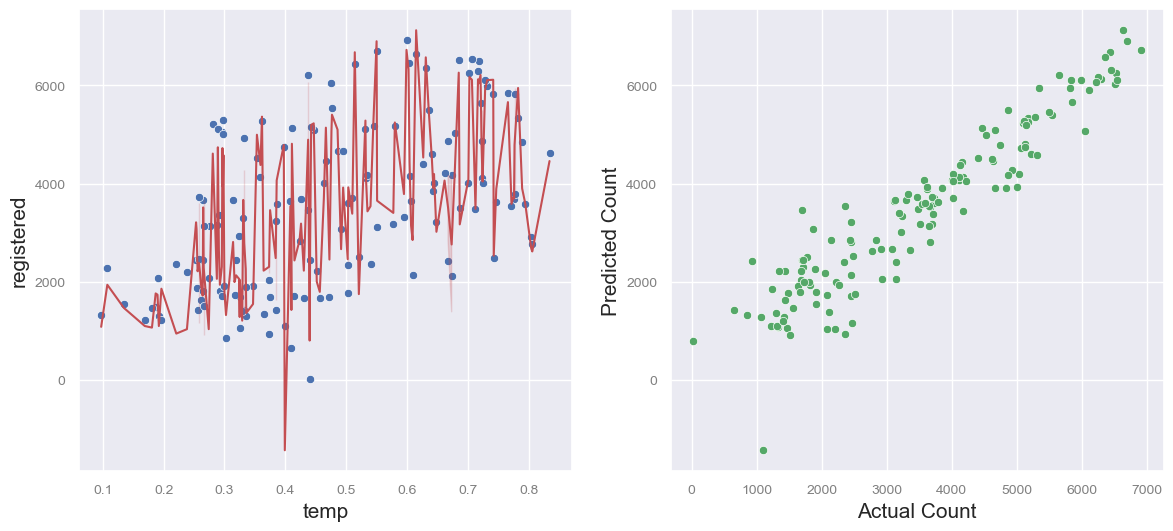

*** Polynomial Regression ***
*** Count   
R-Squared:  0.899052454285529
Root Mean Squared Error:  636.2293420115316
Mean Absolute Percentage Error:  0.35559951233116177
Mean Absolute Error:  484.0877976190476


Slope (Coefficient): -34200330548404.09
Intercept: 175899275083072.97


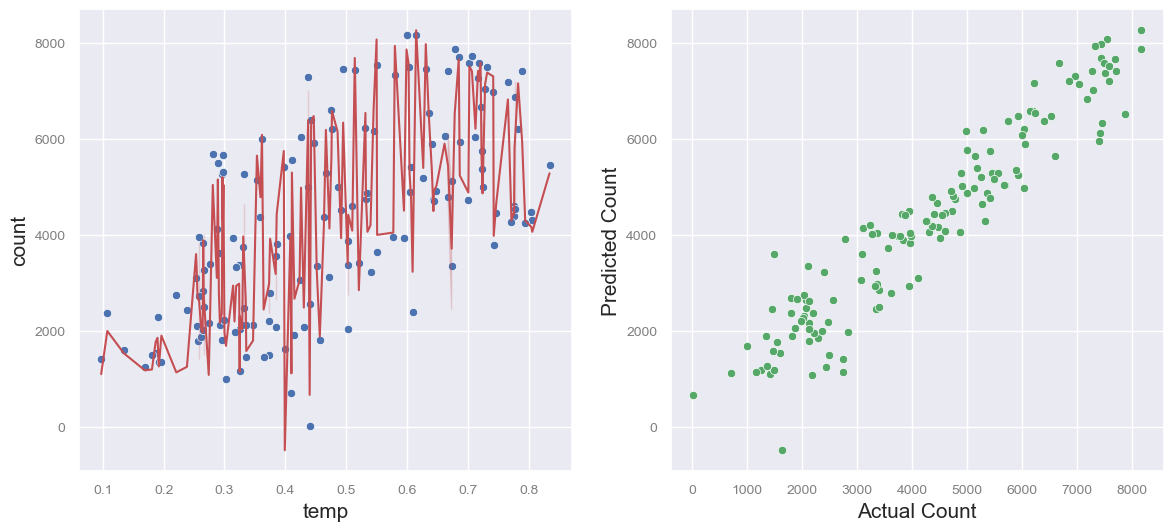

In [350]:
for i in ['line', 'multi', 'poly']:
    for j in ['casual', 'registered', 'count']:
        reg(i, dd_enc, j)

In [255]:
# model.params, summary
# variance inflation factor
# RFE
